# IMPORTATION DES PACKTAGES UTILES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import zscore
import scipy.stats as st

# IMPORTATION DES DONNÉES

In [2]:
erp = pd.read_csv('erp.csv')
web = pd.read_csv("web.csv")
liaison = pd.read_csv("liaison.csv")

# ÉTUDE ET NETTOYAGE DES DATAFRAMES

## DATAFRAME ERP

In [3]:
erp.shape

(825, 5)

In [4]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [6]:
erp["product_id"] = erp["product_id"].astype('string')

In [7]:
only_digit = erp["product_id"].str.isdigit()

In [8]:



erp.insert(1, 'only_digit', only_digit)

In [9]:
erp.describe(include='all')

,product_id,only_digit,onsale_web,price,stock_quantity,stock_status
count,825,825,825.000000,825.000000,825.000000,825
unique,825,1,NaN,NaN,NaN,2
top,4565,True,NaN,NaN,NaN,instock
freq,1,825,NaN,NaN,NaN,638
mean,NaN,NaN,0.869091,32.415636,26.496970,NaN
std,NaN,NaN,0.337506,26.795849,45.892422,NaN
min,NaN,NaN,0.000000,5.200000,0.000000,NaN
25%,NaN,NaN,1.000000,14.600000,1.000000,NaN
50%,NaN,NaN,1.000000,24.400000,11.000000,NaN
75%,NaN,NaN,1.000000,42.000000,34.000000,NaN


In [10]:
print('La colonne product_id est unique et est composée uniquement de chiffre. Elle pourra nous servir de clé de liaison entre les dataframes')

La colonne product_id est unique et est composée uniquement de chiffre. Elle pourra nous servir de clé de liaison entre les dataframes


## DATAFRAME WEB  

In [11]:
web.shape

(1513, 28)

In [12]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [13]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [14]:
web.describe(include='all')

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,716,...,716,589,589,NaN,NaN,1430,NaN,2,1,NaN
top,15473,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,2019-04-18 11:22:53,...,clos-du-mont-olivet-chateauneuf-du-pape-2018,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,2,...,2,14,14,NaN,NaN,1,NaN,716,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.510559,NaN,NaN,0.037385,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [15]:
# Suppression des lignes vides (NAN et/ou 0)
web = web[~web.isin([0, 0.0, np.NAN, np.NaN, '']).all(1)]

# Suppression des colonnes vides
web = web.drop(['virtual', 'downloadable', 'rating_count',
             'average_rating', 'tax_class', 'post_content',
             'post_password', 'post_content_filtered',
             'post_parent', 'menu_order', 'comment_count'], axis=1)

In [16]:
web.describe(include='all')

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
count,1428,1430.000000,716,1430.000000,1430,1430,1430,716,1430,1430,1430,1430,1430,1430,1430,1430,714
unique,714,NaN,1,NaN,716,716,713,679,1,1,1,716,589,589,1430,2,1
top,15473,NaN,taxable,NaN,2019-04-18 11:22:53,2019-03-26 17:00:36,Domaine Hauvette IGP Alpilles Jaspe 2017,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2018,2020-08-26 15:55:03,2020-08-26 13:55:03,https://www.bottle-neck.fr/?post_type=product&...,product,image/jpeg
freq,2,NaN,716,NaN,2,2,4,12,1430,1430,1430,2,14,14,1,716,714
mean,NaN,4.006993,NaN,1.998601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8.510559,NaN,0.037385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Extraction des lignes avec 'sku' qui n'est pas une valeur numérique
web['sku'][web['sku'].str.isdecimal() == False]

0       bon-cadeau-25-euros
797                 13127-1
1209    bon-cadeau-25-euros
1511                13127-1
Name: sku, dtype: object

In [18]:
# Suppression des doublons de la colonne 'sku'
web = web[web['post_mime_type'] == 'image/jpeg']

# Renommage de la colonne 'sku'
web = web.rename(columns={'sku': 'id_web'})

web.describe(include='all')

,id_web,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
count,714,714.000000,0,714.000000,714,714,714,0,714,714,714,714,714,714,714,714,714
unique,714,NaN,0,NaN,714,714,711,0,1,1,1,714,587,587,714,1,1
top,15473,NaN,NaN,NaN,2019-04-18 11:22:53,2019-03-26 17:00:36,Domaine Hauvette IGP Alpilles Jaspe 2017,NaN,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2018,2020-08-26 15:55:03,2020-08-26 13:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
freq,1,NaN,NaN,NaN,1,1,2,NaN,714,714,714,1,7,7,1,714,714
mean,NaN,4.012605,NaN,1.998599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8.518183,NaN,0.037424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATAFRAME LIAISON

In [19]:
liaison.shape

(825, 2)

In [20]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [21]:
liaison["product_id"] = liaison["product_id"].astype('string')

In [22]:
liaison.describe(include="all")

,product_id,id_web
count,825,734
unique,825,734
top,4565,15473
freq,1,1


In [23]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    string
 1   id_web      734 non-null    object
dtypes: object(1), string(1)
memory usage: 13.0+ KB


# FUSION DES DATAFRAMES

In [24]:
# Fusion de erp et liaison sur la colonne 'product_id'
erp_liaison = pd.merge(erp, liaison, on="product_id", how='left')
erp_liaison.describe(include='all')

# Fusion de erp_liaison et web sur la colonne 'id_web'
df = pd.merge(erp_liaison, web, on="id_web", how='right')
df.describe(include='all')

,product_id,only_digit,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_author,...,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
count,714,714,714.0,714.000000,714.000000,714,714,714.000000,0,714.000000,...,0,714,714,714,714,714,714,714,714,714
unique,714,1,NaN,NaN,NaN,2,714,NaN,0,NaN,...,0,1,1,1,714,587,587,714,1,1
top,6616,True,NaN,NaN,NaN,instock,15473,NaN,NaN,NaN,...,NaN,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2018,2020-08-26 15:55:03,2020-08-26 13:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
freq,1,714,NaN,NaN,NaN,574,1,NaN,NaN,NaN,...,NaN,714,714,714,1,7,7,1,714,714
mean,NaN,NaN,1.0,32.493137,28.746499,NaN,NaN,4.012605,NaN,1.998599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,27.810525,48.012608,NaN,NaN,8.518183,NaN,0.037424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.0,5.200000,0.000000,NaN,NaN,0.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.0,14.100000,2.000000,NaN,NaN,0.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.0,23.550000,12.000000,NaN,NaN,1.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.0,42.175000,35.000000,NaN,NaN,4.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Ajout d'une colonne CA = chiffre d'affaires
CA = df["price"] * df["total_sales"]
df.insert(8, 'chiffre_affaires', CA)

### CHIFFRE D'AFFAIRES PAR PRODUITS

In [26]:
# Extraction des colonnes pour CA par produits
CA_PRODUIT = df.sort_values(by=["chiffre_affaires"], ascending=False)
CA_PRODUIT[['product_id', 'price', 'total_sales', 'chiffre_affaires']].head()

,product_id,price,total_sales,chiffre_affaires
194,4334,49.0,96.0,4704.0
71,4144,49.0,87.0,4263.0
218,4402,176.0,13.0,2288.0
70,4142,53.0,30.0,1590.0
69,4141,39.0,40.0,1560.0


## CHIFFRE D'AFFAIRES TOTAL DES VENTES EN LIGNE

In [27]:
CA_TOT = df['chiffre_affaires'][df['onsale_web'] == 1].sum()
print('Chiffre d affaires totale en ligne =', CA_TOT, 'euros')

Chiffre d affaires totale en ligne = 70568.6 euros


# ANALYSE DE LA VARIABLE PRICE

In [28]:
Price = df[['price']]
Price.head()

,price
0,24.2
1,34.3
2,20.8
3,14.1
4,46.0


## ANALYSE UNIVARIÉE

## CALCUL DES VALEURS STATISTIQUES DE BASE

In [29]:
print('min =', df['price'].min(), 'max =', df['price'].max(),
     'mean =', round(df['price'].mean(), 2), 'median =', df['price'].median(),
     'mode =', df['price'].mode()[0])
print('standard deviation =', round(df['price'].std(ddof=0), 2),
     'skw =', round(df['price'].skew(), 2))
#print('variance =', round(Price['price'].var(ddof=0), 2))
#print('kur =', Price['price'].kurtosis())

min = 5.2 max = 225.0 mean = 32.49 median = 23.55 mode = 19.0
standard deviation = 27.79 skw = 2.58


## CALCUL DES QUANTILES UTILES

In [30]:
# Calcul des quatiles
Q1 = Price['price'].quantile(0.25)
C50 = Price['price'].quantile(0.5)
Q3 = Price['price'].quantile(0.75)
C95 = Price['price'].quantile(0.95)

# Écart inter-quartile
IQ = Q3 - Q1

# Calcul de la limite des outliers (valeurs aberrantes)
Limite_sup = Q3 + 1.5*IQ
Limite_inf = Q1 - 1.5*IQ

# MÉTHODE DE L'HISTOGRAMME

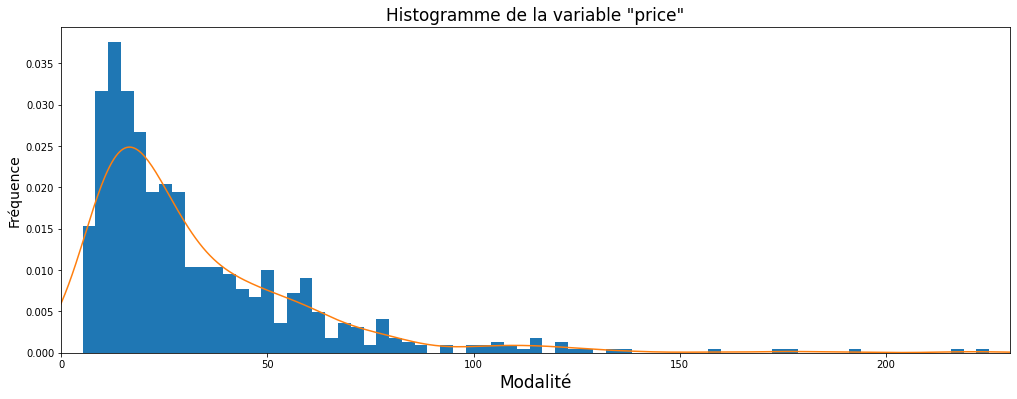

In [31]:
fig, ax = plt.subplots(figsize = (17, 6))

# Tracé de l'histogramme
df['price'].hist(density=True, bins=71)
df['price'].plot(kind = "kde")
ax.set_xlabel('Modalité', size=17); ax.set_xlim(0, 230)
ax.set_ylabel('Fréquence', size=14)
ax.set_title('Histogramme de la variable "price"', size=17)
plt.grid(False)

plt.show()

On remarque que notre distribution semble de forme "normale" mais est asymétrique oblique à gauche (mean > median) et non centrée. Pour en être sûr, nous allons vérifier grâce à la méthode Z-score qui s'applique bien aux distributions de type normale

# MÉTHODE Z-SCORE

In [55]:
# Calcul des scores z
#Price_z_score = Price.apply(zscore)
#Price_z_score.rename(columns={"price": "Z-score"})

In [32]:
df['zscore'] = (df["price"]-df["price"].mean())/df["price"].std(ddof=0)
df[["price", "zscore"]].head()

,price,zscore
0,24.2,-0.298410
1,34.3,0.065016
2,20.8,-0.420752
3,14.1,-0.661837
4,46.0,0.486015


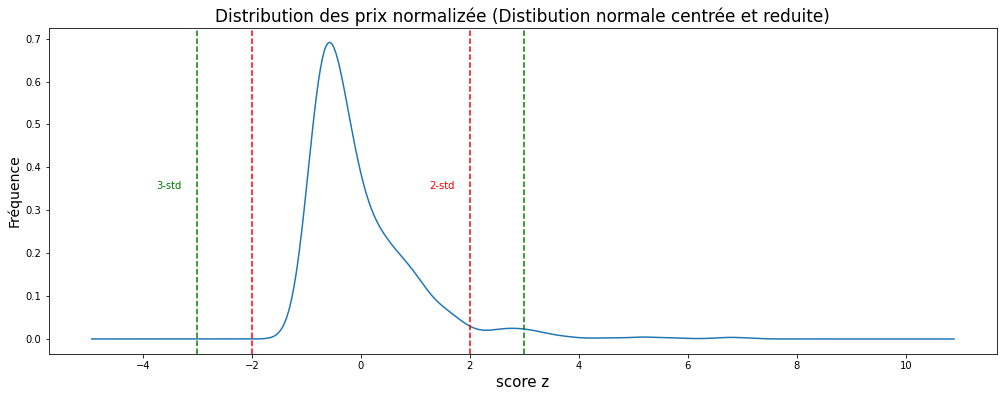

In [33]:
# Tracé du z-score
#Price_z_score.plot(kind = "kde", figsize=(17, 6))
df["zscore"].plot(kind = "kde", figsize=(17, 6))
plt.axvline(-2, linestyle="--", color="red")
plt.axvline(2, linestyle="--", color="red")
plt.text(1.25, 0.35, '2-std', color="red")
plt.text(-3.75, 0.35, '3-std', color="green")
plt.axvline(-3, linestyle="--", color="green")
plt.axvline(3, linestyle="--", color="green")

plt.xlabel('score z', size=15)
plt.ylabel('Fréquence', size=14)
plt.title('Distribution des prix normalizée (Distibution normale centrée et reduite)', size=17)
plt.grid(False)

plt.show()

In [34]:
print('La moyenne des z-score est :', df["zscore"].mean())
print('L écart-type des z-score est :', df["zscore"].std())

La moyenne des z-score est : 9.951578932214288e-18
L écart-type des z-score est : 1.0007010165599808


Notre distribution des Z-score est bien de type normale centrée réduite

In [35]:
# Extraction des scores z hors des écarts-types donnés 
std_2 = df[(df["zscore"] < 2) & (df["zscore"] > -2)]
std_3 = df[(df["zscore"] < 3) & (df["zscore"] > -3)]

print('Pour 2 écart-type, on dénombre', len(std_2), 
      'scores "normaux" sur', len(df["price"]), 'soit', 
      round((len(std_2)/len(df["price"]))*100, 2), '%.')

print('Pour 3 écart-type, on dénombre', len(std_3), 
      'scores "normaux" sur', len(df["price"]), 'soit', 
      round((len(std_3)/len(df["price"]))*100, 2), '%.')

Pour 2 écart-type, on dénombre 684 scores "normaux" sur 714 soit 95.8 %.
Pour 3 écart-type, on dénombre 700 scores "normaux" sur 714 soit 98.04 %.


In [36]:
# Extraction des outliers pour 2 std
outliers_2std = df[(df["zscore"] > 2) | (df["zscore"] < -2)]
nb_outliers_2std = outliers_2std.shape[0]
outliers_2std[["product_id", "price", "stock_quantity", "total_sales", 
          "post_title", 
          "chiffre_affaires"]].sort_values(by=["price"]).head()

,product_id,price,stock_quantity,total_sales,post_title,chiffre_affaires
65,4132,88.4,5,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0
502,5565,92.0,0,0.0,Tempier Bandol Cabassaou 2017,0.0
602,5916,93.0,3,0.0,Wemyss Malts Single Cask Scotch Whisky Chocola...,0.0
655,6214,99.0,7,0.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...,0.0
63,4115,100.0,11,0.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,0.0


In [37]:
print('On dénombre', nb_outliers_2std, 'outliers',
     'sur', df.shape[0], 'soit', 
     round(((nb_outliers_2std)/(df.shape[0]))*100, 2), '%',
     'pour la méthode du zscore')

On dénombre 30 outliers sur 714 soit 4.2 % pour la méthode du zscore


# MÉTHODE BOXPLOT

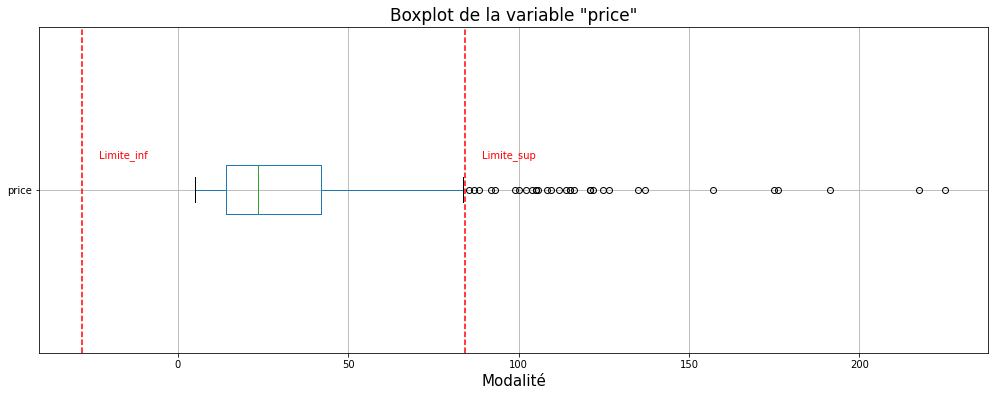

In [38]:
# Tracé de la boxplot
plt.figure(figsize=(17, 6))
Price.boxplot(column="price", vert=False)
plt.axvline(Limite_inf, linestyle="--", color="red")
plt.axvline(Limite_sup, linestyle="--", color="red")
plt.text(Limite_inf+5, 1.1, 'Limite_inf', color="red")
plt.text(Limite_sup+5, 1.1, 'Limite_sup', color="red")

plt.title('Boxplot de la variable "price"', size=17)
plt.xlabel('Modalité', size=15)
plt.show()

In [39]:
print('En dessous du prix', round(Limite_inf, 2),
      'et au delà du prix', round(Limite_sup, 2), 'nous avons des outliers')

En dessous du prix -28.01 et au delà du prix 84.29 nous avons des outliers


In [40]:
# Extraction des outliers 
outliers = df[df["price"] > Limite_sup]
nb_outliers = outliers.shape[0]
outliers[["product_id", "price", "stock_quantity", "total_sales", 
          "post_title", 
          "chiffre_affaires"]].sort_values(by=["price"]).head()

,product_id,price,stock_quantity,total_sales,post_title,chiffre_affaires
205,4359,85.6,0,1.0,Champagne Larmandier-Bernier Grand Cru Les Che...,85.6
438,5026,86.8,2,0.0,Champagne Agrapart &amp; Fils Minéral Extra Br...,0.0
65,4132,88.4,5,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0
502,5565,92.0,0,0.0,Tempier Bandol Cabassaou 2017,0.0
602,5916,93.0,3,0.0,Wemyss Malts Single Cask Scotch Whisky Chocola...,0.0


In [41]:
print('On dénombre', nb_outliers, 'outliers',
     'sur', df.shape[0], 'soit', 
     round(((nb_outliers)/(df.shape[0]))*100, 2), '%',
     'pour la méthode boxplot')

On dénombre 32 outliers sur 714 soit 4.48 % pour la méthode boxplot


In [42]:
# Extraction des valeurs dans la boxplot
boxplot = df[df["price"] < Limite_sup]
nb_boxplot = boxplot.shape[0]

boxplot[["product_id", "price", "stock_quantity", "total_sales", 
          "post_title", 
          "chiffre_affaires"]].sort_values(by=["price"]).head()

,product_id,price,stock_quantity,total_sales,post_title,chiffre_affaires
645,6129,5.2,30,0.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,0.0
99,4174,5.7,94,6.0,Maurel Cabardès Tradition 2017,34.2
98,4173,5.7,100,13.0,Maurel Pays d'Oc Chenin-Colombard 2019,74.1
560,5777,5.7,132,0.0,Maurel Pays d'Oc Cabernet-Sauvignon 2017,0.0
97,4172,5.7,167,43.0,Maurel Pays d'Oc Chardonnay 2019,245.1


In [43]:
print('On dénombre', nb_boxplot, 'valeurs dans notre boite à moustache',
     'sur', nb_outliers+nb_boxplot, 'soit', 
     round((1-(nb_outliers)/(nb_outliers+nb_boxplot))*100, 2), '%')

On dénombre 682 valeurs dans notre boite à moustache sur 714 soit 95.52 %


## COMPARAISON ENTRE OUTLIERS ET BOXPLOT

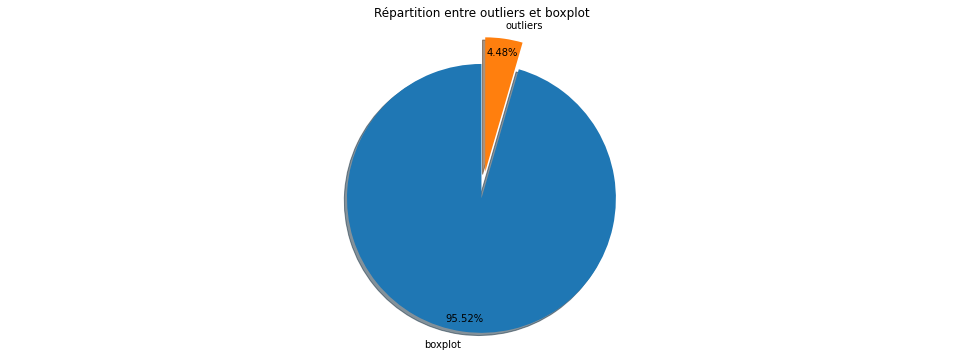

boxplot = 682 valeurs. outliers = 32 valeurs.


In [44]:
# Ratio entre valeurs dans boxplot et outliers
labels = ['boxplot', 'outliers']
sizes = [nb_boxplot, nb_outliers]
explode = [0.1, 0.1]

fig1, ax1 = plt.subplots(figsize=(17, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        pctdistance=0.9, shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Répartition entre outliers et boxplot')
plt.show()
print('boxplot =', nb_boxplot, 'valeurs.'' outliers =', nb_outliers, 'valeurs.')

# MÉTHODE INTERVALLE INTERQUANTILE

# MÉTHODE NUAGE DE POINTS

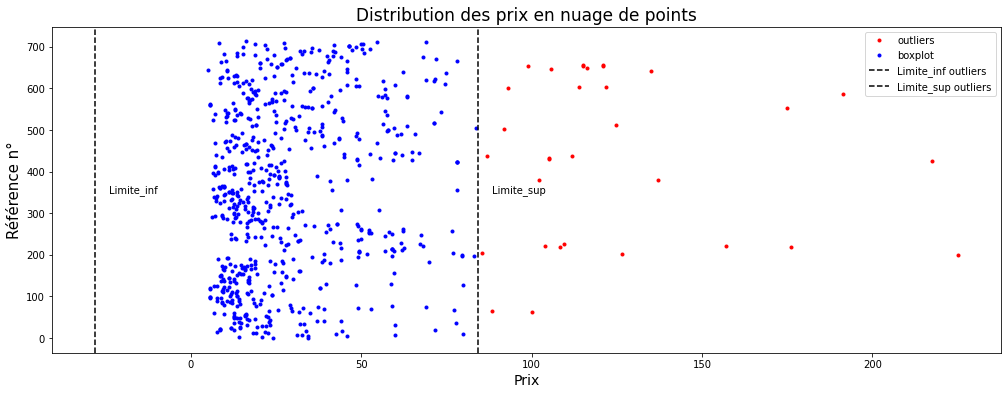

In [45]:
plt.subplots(figsize=(17, 6))
plt.plot(outliers['price'], outliers.index, '.', color="red", label="outliers")
plt.plot(boxplot['price'], boxplot.index, '.', color="blue", label="boxplot")

plt.title('Distribution des prix en nuage de points', size=17)
plt.ylabel('Référence n°', size=15)
plt.xlabel('Prix', size=14)
plt.axvline(Limite_inf, color="k", linestyle="--", label="Limite_inf outliers")
plt.axvline(Limite_sup, color="k", linestyle="--", label="Limite_sup outliers")
plt.text(Limite_inf+4, 350, 'Limite_inf', color="k")
plt.text(Limite_sup+4, 350, 'Limite_sup', color="k")
plt.legend()
plt.show()

# VENTES NULLES ENTRE OUTLIERS ET BOXPLOT

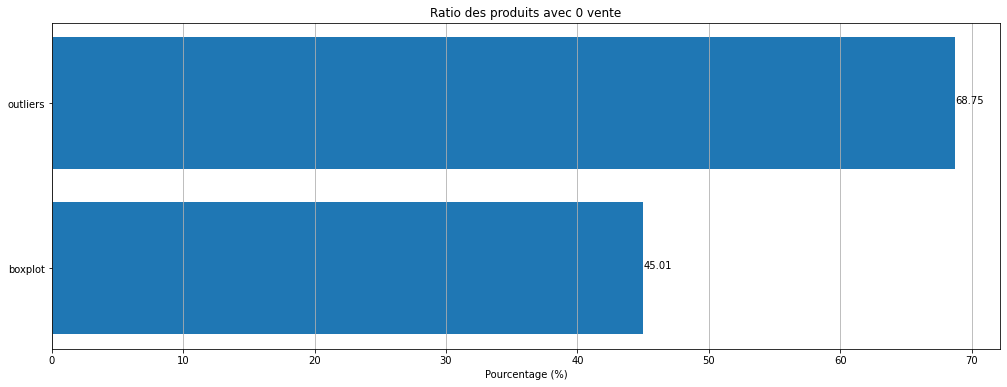

In [46]:
# Valeurs nulles et ratio pour CA dans outliers
CA_null_outliers = (outliers['chiffre_affaires'] == 0).sum()
Ratio_CA_null_outliers = (CA_null_outliers/nb_outliers)*100
Ratio_CA_null_outliers

# Valeurs nulles et ratio pour CA dans boxplot
CA_null_boxplot = (boxplot['chiffre_affaires'] == 0).sum()
Ratio_CA_null_boxplot = (CA_null_boxplot/nb_boxplot)*100
round(Ratio_CA_null_boxplot, 2)

# Tracé du graphique
names = ['boxplot', 'outliers']
values = [round(Ratio_CA_null_boxplot, 2), Ratio_CA_null_outliers]
plt.figure(figsize=(17, 6))
plt.barh(names, values)
plt.xlabel('Pourcentage (%)')
plt.title('Ratio des produits avec 0 vente')
plt.grid(axis='x')

for index, value in enumerate(values):
    ax=plt.text(value, index,
             str('{:,}'.format(value)), ha='left')

plt.show()